In [1]:
import astropy.units as un
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck18
from astropy.io import fits
from astropy.stats import median_absolute_deviation as mad
from astropy.units import Quantity
from astropy.wcs import WCS
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def get_lims(wcs: WCS = None, radius: Quantity = None, center_coord: SkyCoord = None):
    if isinstance(radius, Quantity):
        if radius.isscalar:
            radius_x = radius_y = radius
        else:
            radius_x = radius[0]
            radius_y = radius[1]

    else:
        if isinstance(radius, list):
            radius_x = radius[0] * un.deg
            radius_y = radius[1] * un.deg
        else:
            radius_x = radius_y = radius * un.deg

    left_corner = SkyCoord(ra=center_coord.ra - radius_x, dec=center_coord.dec - radius_y)
    right_corner = SkyCoord(ra=center_coord.ra + radius_x, dec=center_coord.dec + radius_y)
    left, up = left_corner.to_pixel(wcs, origin=0)
    right, down = right_corner.to_pixel(wcs, origin=0)
    xlim = [int(right), int(left)]
    ylim = [int(up), int(down)]
    return xlim, ylim

In [33]:
rm_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/delta_wavelet_56/max_faraday_depth.fits"
)[0]
p_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/delta_wavelet_56/max_rotated_intensity.fits"
)[0]
sigma_qu_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/delta_wavelet_56/sigma_qu_faraday.fits"
)[0]
sigma_phi_hdu = fits.open(
    "/home/miguel/Documents/datasets/A1314_JVLA/mfs/rm_images/delta_wavelet_56/sigma_phi_peak.fits"
)[0]

In [34]:
cluster_center_coord = SkyCoord(ra=173.714 * un.deg, dec=49.091 * un.deg, frame="fk5")

In [35]:
center_coord = SkyCoord(ra=173.705 * un.deg,dec=49.077 *un.deg, frame="fk5") # Center Source 10
#center_coord = SkyCoord(ra=173.479 * un.deg,dec=49.064 *un.deg, frame="fk5") # C-W Source 3
#center_coord = SkyCoord(ra=173.654 * un.deg, dec=48.978 * un.deg, frame="fk5")  # C-S Extended 9
#center_coord = SkyCoord(ra=173.453 * un.deg,dec=48.985 *un.deg, frame="fk5") # S-W Source 1
#center_coord = SkyCoord(ra=173.803 * un.deg,dec=48.966 *un.deg, frame="fk5") # S-E Source 13#

In [36]:
# Centers based on core centers
#center_coord = SkyCoord(ra=173.705 * un.deg,dec=49.077 *un.deg, frame="fk5") # Center Source 10*
#center_coord = SkyCoord(ra=173.496 * un.deg,dec=49.062 *un.deg, frame="fk5") # C-W Source 3*
#center_coord = SkyCoord(ra=173.693 * un.deg,dec=48.956 *un.deg, frame="fk5") # C-S Extended 9*
#center_coord = SkyCoord(ra=173.453 * un.deg,dec=48.985 *un.deg, frame="fk5") # S-W Source 1 *
#center_coord = SkyCoord(ra=173.803 * un.deg,dec=48.966 *un.deg, frame="fk5") # S-E Source 13*
#center_coord = SkyCoord(ra=173.521 * un.deg,dec=49.106 *un.deg, frame="fk5") # 5*
#center_coord = SkyCoord(ra=173.762 * un.deg,dec=49.193 *un.deg, frame="fk5") # 12*
#center_coord = SkyCoord(ra=173.943 * un.deg, dec=48.921 * un.deg, frame="fk5")  # 15*

In [37]:
dist_to_center = center_coord.separation(cluster_center_coord)

In [38]:
dist_to_center.arcsec * un.arcsec

<Quantity 54.68516322 arcsec>

In [39]:
redshift_z = 0.034  # X-Ray Center
#redshift_z = 0.033 # Center Source
#redshift_z = 0.032 # C-W Source
#redshift_z = 0.032 # C-S Extended

In [40]:
dist = Planck18.comoving_distance(redshift_z)
scale = Planck18.arcsec_per_kpc_comoving(redshift_z)

In [41]:
dist_kpc = dist_to_center.arcsecond * un.arcsec / scale

In [42]:
dist_kpc

<Quantity 39.62137268 kpc>

In [43]:
wcs = WCS(rm_hdu.header, naxis=2)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [44]:
rm = rm_hdu.data
p = p_hdu.data
sigma_qu = sigma_qu_hdu.data
sigma_phi = sigma_phi_hdu.data

In [45]:
rm = np.where(p > 6 * sigma_qu, rm, np.nan)
sigma_phi = np.where(p > 6 * sigma_qu, sigma_phi, np.nan)
sigma_qu = np.where(p > 6 * sigma_qu, sigma_qu, np.nan)

In [46]:
x_lim, y_lim = get_lims(wcs, radius=0.01 * un.deg, center_coord=center_coord)

In [47]:
rm = rm[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]
sigma_phi = sigma_phi[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]
p = p[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]
sigma_qu = sigma_qu[y_lim[0]:y_lim[1], x_lim[0]:x_lim[1]]

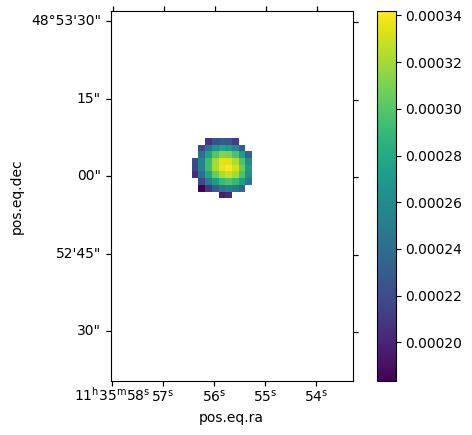

In [48]:
fig = plt.figure()
ax = plt.subplot(projection=wcs)
im = ax.imshow(p)
#ax.set_xlim(x_lim[1], x_lim[0])
#ax.set_ylim(y_lim[1], y_lim[0])
fig.colorbar(im, ax=ax, orientation='vertical')

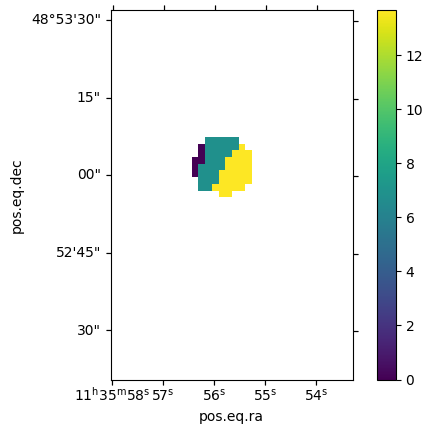

In [49]:
fig = plt.figure()
ax = plt.subplot(projection=wcs)
im = ax.imshow(rm)
#ax.set_xlim(x_lim[1], x_lim[0])
#ax.set_ylim(y_lim[1], y_lim[0])
fig.colorbar(im, ax=ax, orientation='vertical')

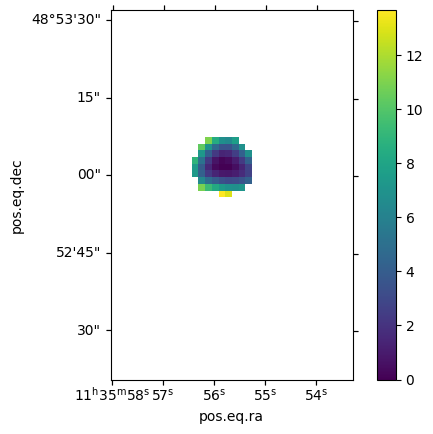

In [50]:
fig = plt.figure()
ax = plt.subplot(projection=wcs)
ax.imshow(sigma_phi)
#ax.set_xlim(x_lim[1], x_lim[0])
#ax.set_ylim(y_lim[1], y_lim[0])
fig.colorbar(im, ax=ax, orientation='vertical')

In [51]:
rm[~np.isnan(rm)]

array([13.66711254, 13.66711254,  6.83355627,  6.83355627, 13.66711254,
       13.66711254, 13.66711254, 13.66711254, 13.66711254,  6.83355627,
        6.83355627,  6.83355627, 13.66711254, 13.66711254, 13.66711254,
       13.66711254, 13.66711254,  0.        ,  6.83355627,  6.83355627,
        6.83355627, 13.66711254, 13.66711254, 13.66711254, 13.66711254,
       13.66711254,  0.        ,  6.83355627,  6.83355627,  6.83355627,
        6.83355627, 13.66711254, 13.66711254, 13.66711254, 13.66711254,
        0.        ,  0.        ,  6.83355627,  6.83355627,  6.83355627,
       13.66711254, 13.66711254, 13.66711254, 13.66711254,  0.        ,
        6.83355627,  6.83355627,  6.83355627,  6.83355627, 13.66711254,
       13.66711254, 13.66711254,  0.        ,  6.83355627,  6.83355627,
        6.83355627,  6.83355627,  6.83355627, 13.66711254,  6.83355627,
        6.83355627,  6.83355627,  6.83355627,  6.83355627])

In [52]:
sigma_phi[~np.isnan(sigma_phi)]

array([1.76534076, 1.71846551, 1.58939874, 1.48867207, 1.42344321,
       1.3686418 , 1.33760379, 1.33134584, 1.34786596, 1.30296175,
       1.19989175, 1.14940997, 1.10653442, 1.08938171, 1.09438021,
       1.11750068, 1.1641487 , 1.36453428, 1.16229588, 1.04015338,
       0.98058908, 0.95288034, 0.94679311, 0.96457018, 1.00108522,
       1.06190905, 1.36664915, 1.1460169 , 0.99342255, 0.91507522,
       0.89169006, 0.89410512, 0.92542994, 0.98240492, 1.06887132,
       1.4585936 , 1.22108069, 1.04031338, 0.93834324, 0.90310269,
       0.91662436, 0.96018937, 1.04190693, 1.16536433, 1.35786487,
       1.16077209, 1.03536521, 0.98161261, 0.99166276, 1.05231409,
       1.16160614, 1.33124333, 1.55241607, 1.34312447, 1.19483604,
       1.11893518, 1.11656742, 1.18958193, 1.33228487, 1.59729652,
       1.4278583 , 1.32738773, 1.30569117, 1.38005139])

In [53]:
dx = rm_hdu.header["CDELT1"] * un.deg
dy = rm_hdu.header["CDELT2"] * un.deg

In [54]:
npixels = np.count_nonzero(~np.isnan(rm))

In [55]:
bmaj = 12.381457328796387 * un.arcsec
bmin = 11.684733390808105 * un.arcsec
area_pixels = np.pi * bmaj.to(un.deg) * bmin.to(un.deg) / (4. * np.log(2)) / (-dx * dy)
nbeams = npixels / area_pixels

In [56]:
sigma_phi.shape

(55, 36)

In [57]:
pos_max = np.unravel_index(np.nanargmax(p), shape=p.shape)
max_rm = rm[pos_max]
sigma_phi_at_max = sigma_phi[pos_max]
avg_rm = np.nanmean(rm)
med_rm = np.nanmedian(rm)
mad_rm = np.nanmedian(np.abs(rm - np.nanmedian(rm)))
sigma_rm_obs = np.nanstd(rm)
med_sigma_phi = np.nanmedian(sigma_phi)
sigma_rm = np.sqrt(sigma_rm_obs**2 - med_sigma_phi**2)

In [58]:
mean_error = sigma_rm_obs / np.sqrt(nbeams)
sigma_error = sigma_rm / np.sqrt(nbeams)

In [59]:
print("RM at max(P): {0:.3f}".format(max_rm))
print("sigma phi at max(P): {0:.3f}".format(sigma_phi_at_max))
print("<RM> : {0:.3f}".format(avg_rm))
print("sigma(RM): {0:.3f}".format(sigma_rm))
print("med(RM): {0:.3f}".format(med_rm))
print("MAD(RM): {0:.3f}".format(mad_rm))
print("med(sigma_phi): {0:.3f}".format(med_sigma_phi))
print("nbeams: {0:.3f}".format(nbeams))
print("sigma(RM)_obs: {0: .3f}".format(sigma_rm_obs))
print("mean error: {0: .3f}".format(mean_error))
print("sigma error: {0: .3f}".format(sigma_error))

RM at max(P): 13.667
sigma phi at max(P): 0.894
<RM> : 9.289
sigma(RM): 4.263
med(RM): 6.834
MAD(RM): 6.834
med(sigma_phi): 1.155
nbeams: 0.660
sigma(RM)_obs:  4.417
mean error:  5.437
sigma error:  5.248


In [30]:
sigma_rm_obs**2

41.1795260163382

In [31]:
-med_sigma_phi**2

-1.6451696380667844

In [32]:
sigma_rm = np.sqrt(sigma_rm_obs**2 - med_sigma_phi**2)